In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("currency_exchange_rates.csv")

In [3]:
df.head()

,Date,EUR,USD,JPY,CYP,CZK,DKK,EEK,GBP,HUF,...,CNY,IDR,MYR,PHP,THB,RON,BRL,MXN,INR,ILS
0,2000-01-03,0.991080,1.0,101.833499,0.571556,35.741328,7.374034,15.507037,0.619029,252.259663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.970403,1.0,102.746240,0.560408,35.196507,7.222610,15.183503,0.610966,246.986900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,0.964506,1.0,103.530093,0.557292,35.047261,7.180170,15.091242,0.609954,245.476466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,0.962649,1.0,104.659222,0.556508,34.889295,7.166057,15.062187,0.606662,244.946092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,0.972384,1.0,105.105018,0.561620,35.032089,7.238040,15.214508,0.608907,247.598211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8399 non-null   object 
 1   EUR     8399 non-null   float64
 2   USD     8399 non-null   float64
 3   JPY     8399 non-null   float64
 4   CYP     2921 non-null   float64
 5   CZK     8399 non-null   float64
 6   DKK     8399 non-null   float64
 7   EEK     4018 non-null   float64
 8   GBP     8399 non-null   float64
 9   HUF     8399 non-null   float64
 10  LTL     5478 non-null   float64
 11  LVL     5113 non-null   float64
 12  MTL     2921 non-null   float64
 13  PLN     8399 non-null   float64
 14  ROL     2006 non-null   float64
 15  SEK     8399 non-null   float64
 16  SIT     2556 non-null   float64
 17  SKK     3287 non-null   float64
 18  CHF     8399 non-null   float64
 19  ISK     5059 non-null   float64
 20  NOK     8399 non-null   float64
 21  TRL     1827 non-null   float64
 22  

In [5]:
df.isnull().sum()

Date       0
EUR        0
USD        0
JPY        0
CYP     5478
CZK        0
DKK        0
EEK     4381
GBP        0
HUF        0
LTL     2921
LVL     3286
MTL     5478
PLN        0
ROL     6393
SEK        0
SIT     5843
SKK     5112
CHF        0
ISK     3340
NOK        0
TRL     6572
AUD        0
CAD        0
HKD        0
KRW        0
NZD        0
SGD        0
ZAR        0
BGN      198
TRY     1827
HRK     1915
RUB     2220
CNY     1915
IDR     1915
MYR     1915
PHP     1915
THB     1915
RON     2006
BRL     2921
MXN     2921
INR     3287
ILS     4018
dtype: int64

In [6]:
df_clean = df.copy()

df_clean.dropna(axis = 1, inplace = True)

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8399 non-null   object 
 1   EUR     8399 non-null   float64
 2   USD     8399 non-null   float64
 3   JPY     8399 non-null   float64
 4   CZK     8399 non-null   float64
 5   DKK     8399 non-null   float64
 6   GBP     8399 non-null   float64
 7   HUF     8399 non-null   float64
 8   PLN     8399 non-null   float64
 9   SEK     8399 non-null   float64
 10  CHF     8399 non-null   float64
 11  NOK     8399 non-null   float64
 12  AUD     8399 non-null   float64
 13  CAD     8399 non-null   float64
 14  HKD     8399 non-null   float64
 15  KRW     8399 non-null   float64
 16  NZD     8399 non-null   float64
 17  SGD     8399 non-null   float64
 18  ZAR     8399 non-null   float64
dtypes: float64(18), object(1)
memory usage: 1.2+ MB


In [8]:
df_clean.columns

Index(['Date', 'EUR', 'USD', 'JPY', 'CZK', 'DKK', 'GBP', 'HUF', 'PLN', 'SEK',
       'CHF', 'NOK', 'AUD', 'CAD', 'HKD', 'KRW', 'NZD', 'SGD', 'ZAR'],
      dtype='object')

In [9]:
df_clean["Date"] = pd.to_datetime(df_clean["Date"])

In [10]:
df_clean.head()

,Date,EUR,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,2000-01-03,0.991080,1.0,101.833499,35.741328,7.374034,0.619029,252.259663,4.146184,8.475719,1.589990,7.990089,1.520912,1.444698,7.792270,1129.851338,1.915857,1.661943,6.145986
1,2000-01-04,0.970403,1.0,102.746240,35.196507,7.222610,0.610966,246.986900,4.116739,8.366327,1.557787,7.908782,1.521300,1.449393,7.782727,1123.066473,1.916060,1.654246,6.121980
2,2000-01-05,0.964506,1.0,103.530093,35.047261,7.180170,0.609954,245.476466,4.111400,8.334780,1.548997,7.914738,1.521316,1.453029,7.776717,1134.336420,1.924769,1.654996,6.072531
3,2000-01-06,0.962649,1.0,104.659222,34.889295,7.166057,0.606662,244.946092,4.100212,8.321621,1.546785,7.896611,1.523681,1.452734,7.782345,1147.381594,1.931459,1.664517,6.093955
4,2000-01-07,0.972384,1.0,105.105018,35.032089,7.238040,0.608907,247.598211,4.073998,8.406262,1.563497,7.968203,1.530338,1.459549,7.781991,1137.222870,1.939129,1.662388,6.066997


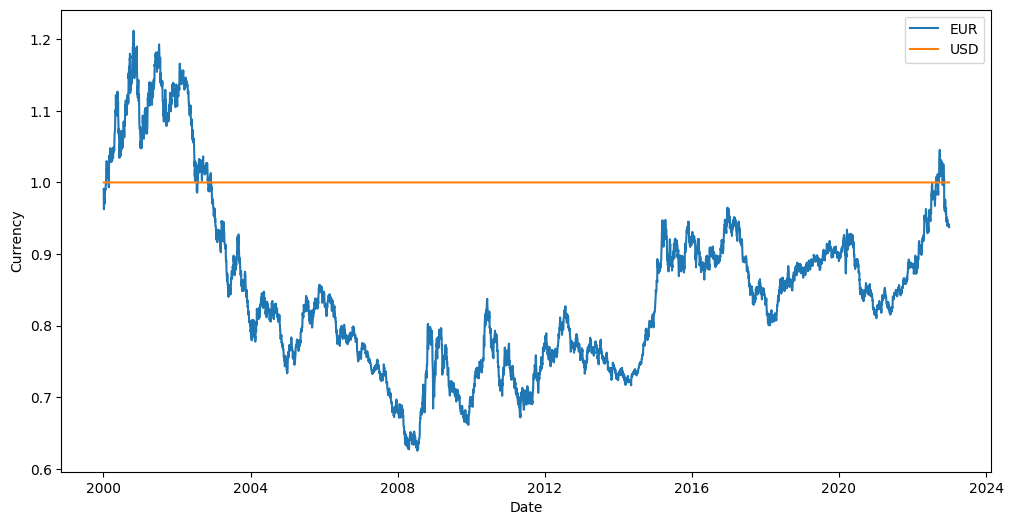

In [11]:
plt.figure(figsize= ((12,6)))
sb.lineplot(data = df_clean, x = "Date", y = "EUR", label = "EUR")
sb.lineplot(data = df_clean, x = "Date", y = "USD", label = "USD")

plt.xlabel("Date")
plt.ylabel("Currency")
plt.legend()
plt.show()

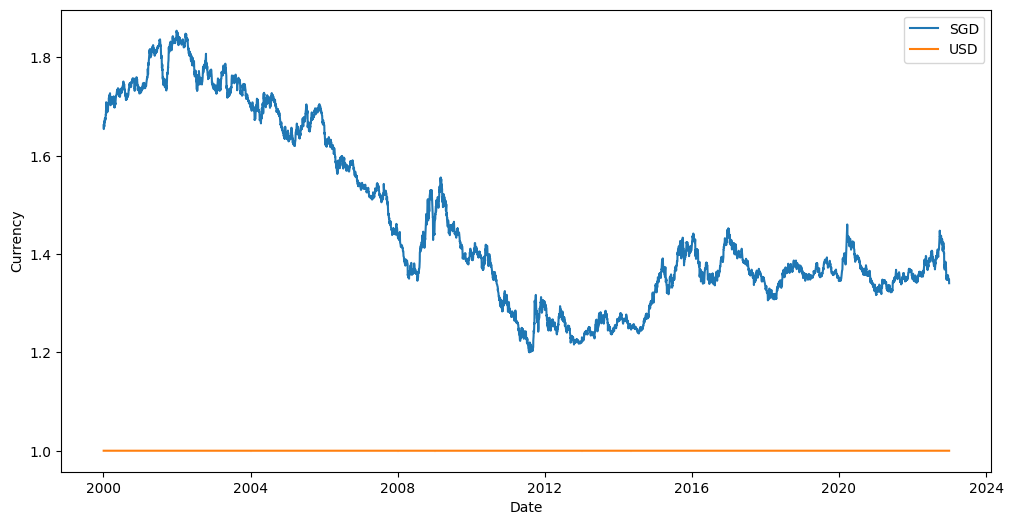

In [12]:
plt.figure(figsize= ((12,6)))
sb.lineplot(data = df_clean, x = "Date", y = "SGD", label = "SGD")
sb.lineplot(data = df_clean, x = "Date", y = "USD", label = "USD")

plt.xlabel("Date")
plt.ylabel("Currency")
plt.legend()
plt.show()

### There are many factors that might affect a countries' currency value, such as a country's economic performance, inflation, capital flow and etc. The aim of this project is to create a model to predict the currency rates of SGD

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_sgd = df_clean[["Date","SGD"]]

<Axes: xlabel='Date'>

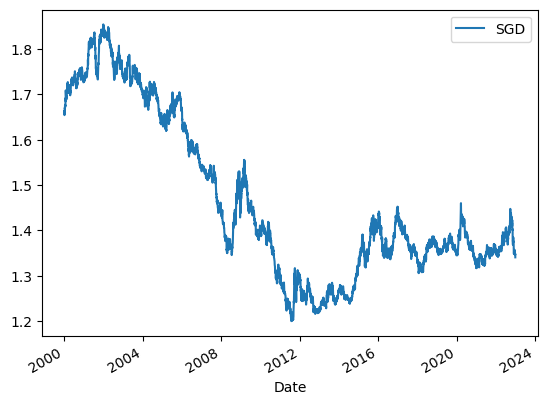

In [15]:
df_sgd.plot(x = "Date", y ="SGD")

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df_sgd.set_index("Date", inplace = True)

In [18]:
df_sgd.head()

,SGD
Date,
2000-01-03,1.661943
2000-01-04,1.654246
2000-01-05,1.654996
2000-01-06,1.664517
2000-01-07,1.662388


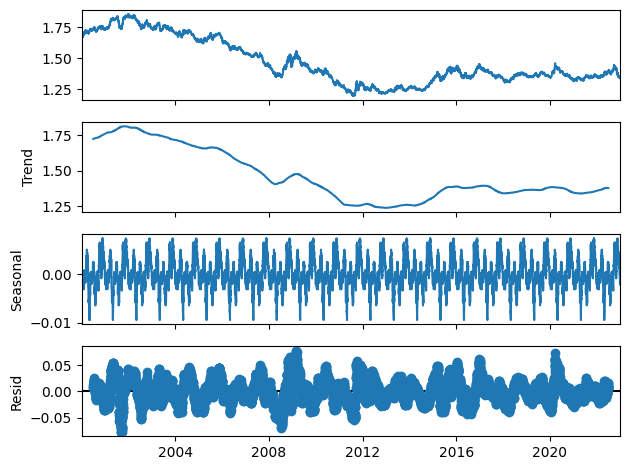

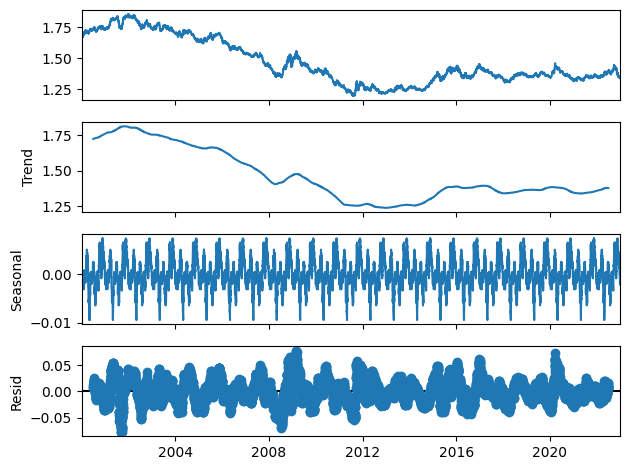

In [19]:
result = seasonal_decompose(df_sgd, period = 365)
result.plot()

Overall the plot shows that SGD currency is experiencing a downwards trend and a strong seasonality

### Autocorrelation

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

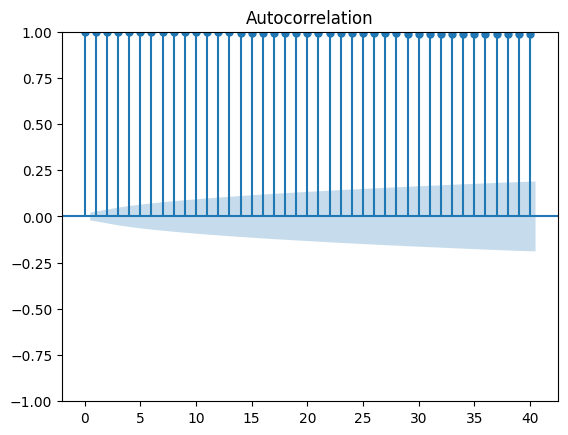

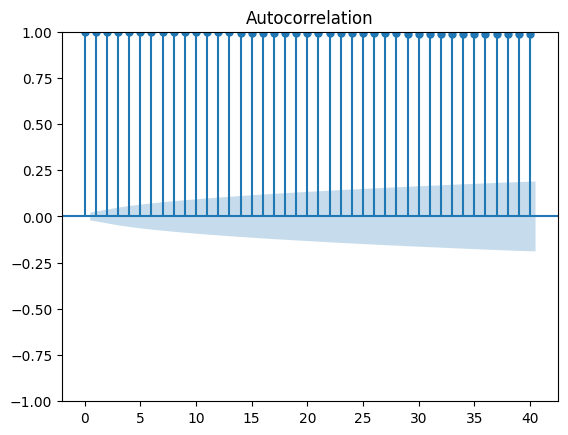

In [21]:
plot_acf(df_sgd)

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

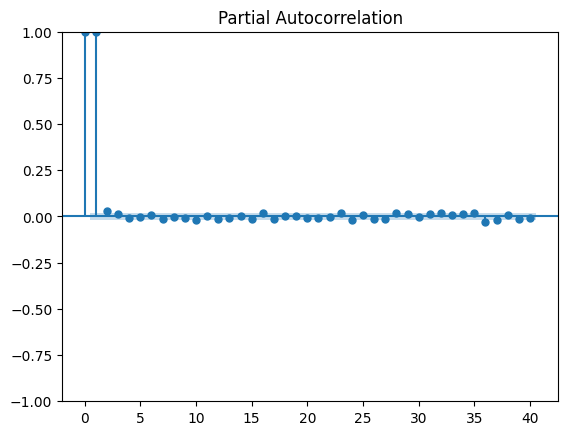

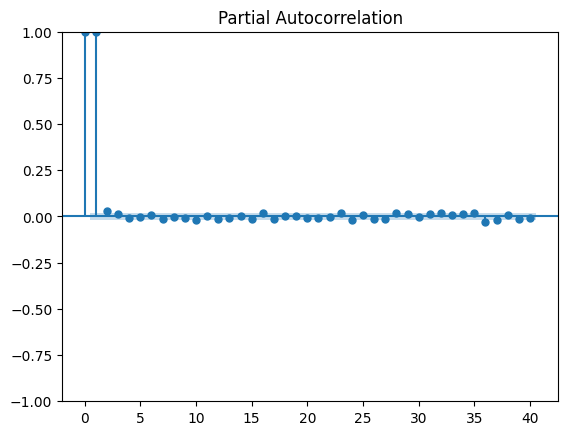

In [23]:
plot_pacf(df_sgd)

### Stationarity


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_sgd.SGD.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -1.1260861785828626
ADF p-values: 0.7045577365398631
ADF number of lags used: 2
ADF number of observations: 8396
ADF critical values: {'1%': -3.431129097238232, '5%': -2.8618843073911098, '10%': -2.566953269957608}
ADF best information criterion: -68761.2325839609


As the P value is > 0.05 we cannot reject the null hypothesis that the currency graph is non-stationary

### Exploring Time Series Machine Learning Models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
def get_quarter(df):
    
    if (df["months"] <= 3):
        return 1
    
    elif (df['months'] <= 6) and (df['months'] > 3):
        return 2
              
    elif (df['months'] <= 9) and (df['months'] > 6):
        return 3

    elif (df['months'] <= 12) and (df['months'] > 9):
        return 4

In [28]:
weekdays = {"Monday" : 1, "Tuesday" : 2, "Wednesday" : 3, "Thursday" : 4, "Friday" : 5 , "Saturday" : 6, "Sunday" : 7}

In [29]:
df_sgd["months"] = df_sgd.index.month
df_sgd["year"] = df_sgd.index.year
df_sgd["day"] = df_sgd.index.day
df_sgd['weekday'] = df_sgd.index.day_name()
df_sgd['week'] = df_sgd.index.isocalendar().week
df_sgd['quarter'] = df_sgd.apply(get_quarter, axis = 1)

C:\Users\eric2\AppData\Local\Temp\ipykernel_36916\3505833413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["months"] = df_sgd.index.month
C:\Users\eric2\AppData\Local\Temp\ipykernel_36916\3505833413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["year"] = df_sgd.index.year
C:\Users\eric2\AppData\Local\Temp\ipykernel_36916\3505833413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [30]:
df_sgd["weekday"].replace(weekdays, inplace = True)

C:\Users\eric2\AppData\Local\Temp\ipykernel_36916\2846740470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["weekday"].replace(weekdays, inplace = True)


In [31]:
df_sgd["week"] = df_sgd["week"].astype('int')

C:\Users\eric2\AppData\Local\Temp\ipykernel_36916\1088544280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgd["week"] = df_sgd["week"].astype('int')


In [32]:
df_sgd.head()

,SGD,months,year,day,weekday,week,quarter
Date,,,,,,,
2000-01-03,1.661943,1,2000,3,1,1,1
2000-01-04,1.654246,1,2000,4,2,1,1
2000-01-05,1.654996,1,2000,5,3,1,1
2000-01-06,1.664517,1,2000,6,4,1,1
2000-01-07,1.662388,1,2000,7,5,1,1


In [33]:
y = df_sgd["SGD"]

In [34]:
X = df_sgd[["months","day","year","weekday", "week", "quarter"]]

In [35]:
split_ratio = 0.8 # Specify the ratio for the split (e.g., 80% for training, 20% for testing)
split_index = int(len(X) * split_ratio)  # Calculate the index for splitting the data

X_train = X[:split_index]  # Select the first split_index rows for training features
X_test = X[split_index:]  # Select the remaining rows for testing features

y_train = y[:split_index]  # Select the corresponding target values for training
y_test = y[split_index:]  # Select the corresponding target values for testing

#### Evaluation Metrics

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [37]:
K_VALUE = len(X_test.columns)

In [38]:
def aic(y, y_pred, k = K_VALUE):
    
    resid = y - y_pred.ravel()
    sse = sum(resid ** 2)

    AIC = 2*k - 2*np.log(sse)

    return AIC

In [39]:
def evaluate(y_test,y_pred):
    aic_score = aic(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"AIC: {aic_score} \n MAE: {mae} \n MSE: {mse}")
    
    return {'AIC' : aic_score, 'mae' : mae , 'mse' : mse } 

In [40]:
len(X_test)

1680

In [41]:
len(X_train)

6719

In [42]:
X_test

,months,day,year,weekday,week,quarter
Date,,,,,,
2018-05-25,5,25,2018,5,21,2
2018-05-28,5,28,2018,1,22,2
2018-05-29,5,29,2018,2,22,2
2018-05-30,5,30,2018,3,22,2
2018-05-31,5,31,2018,4,22,2
...,...,...,...,...,...,...
2022-12-27,12,27,2022,2,52,4
2022-12-28,12,28,2022,3,52,4
2022-12-29,12,29,2022,4,52,4


In [43]:
y_test

Date
2018-05-25    1.340642
2018-05-28    1.341034
2018-05-29    1.346686
2018-05-30    1.340096
2018-05-31    1.338234
                ...   
2022-12-27    1.346009
2022-12-28    1.346147
2022-12-29    1.348483
2022-12-30    1.340709
2022-12-30    1.340709
Name: SGD, Length: 1680, dtype: float64

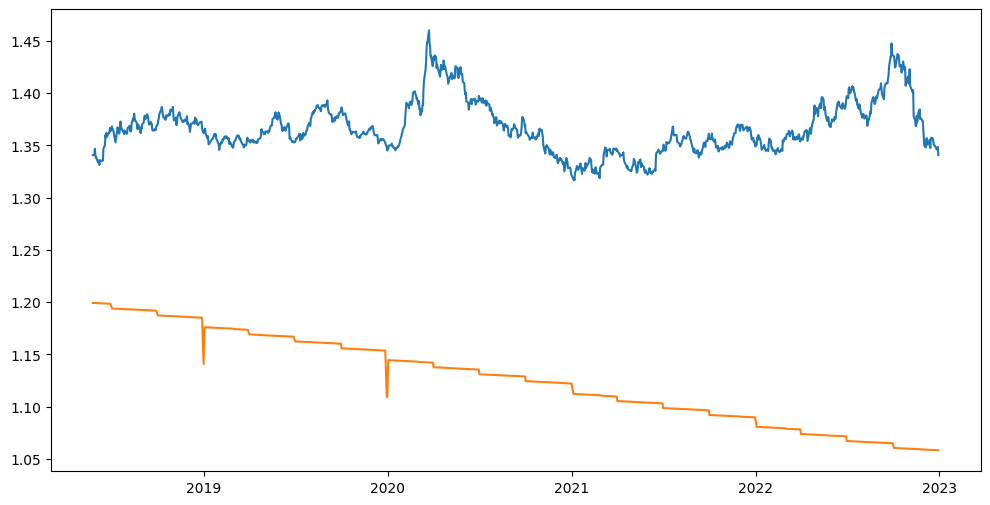

In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()


In [45]:
evaluate(y_test,y_pred)

AIC: 2.7699860039924786 
 MAE: 0.2401171192185537 
 MSE: 0.06011222336199859


{'AIC': 2.7699860039924786,
 'mae': 0.2401171192185537,
 'mse': 0.06011222336199859}

As the linear regression is not perfroming well, we will try out with diff

In [46]:
y_train_diff = y_train.diff().dropna()
X_train_diff = X_train.diff().dropna()

# Perform differencing on the test set
y_test_diff = y_test.diff().dropna()
X_test_diff = X_test.diff().dropna()

# Train your linear regression model with differenced train data
model = LinearRegression()
model.fit(X_train_diff, y_train_diff)

# Predict using differenced test data
y_pred_diff = model.predict(X_test_diff)

# Perform inverse differencing on the predicted values to obtain the final predictions
y_pred = pd.Series(y_pred_diff, index=y_test.index[1:]).cumsum().add(y_test.iloc[0])

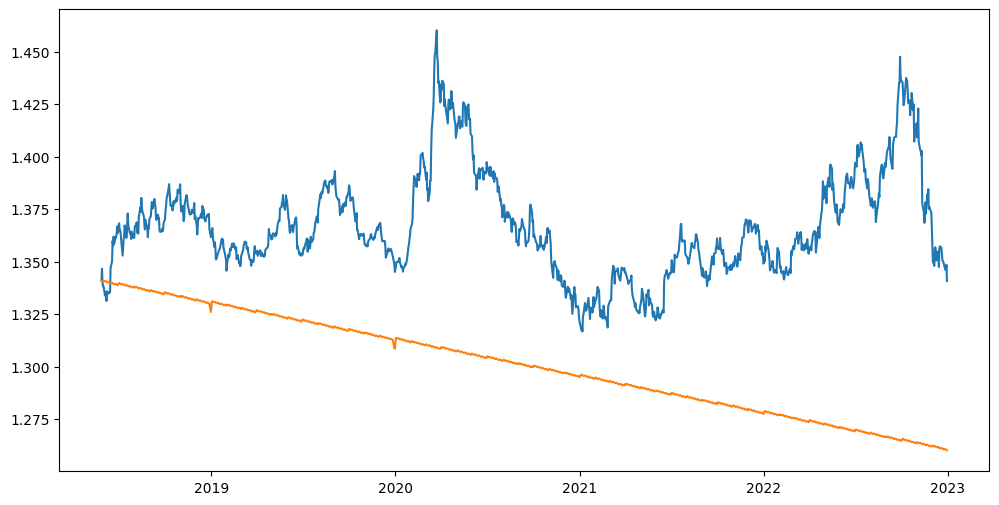

In [47]:
plt.figure(figsize=(12,6))
plt.plot(X_test.index[1:],y_test[1:])
plt.plot(X_test.index[1:],y_pred)

plt.show()

In [48]:
evaluate(y_test_diff,y_pred_diff)

AIC: 20.157065041081463 
 MAE: 0.0019649936378435704 
 MSE: 1.0084749985257256e-05


{'AIC': 20.157065041081463,
 'mae': 0.0019649936378435704,
 'mse': 1.0084749985257256e-05}

In [49]:
from sklearn.tree import DecisionTreeRegressor

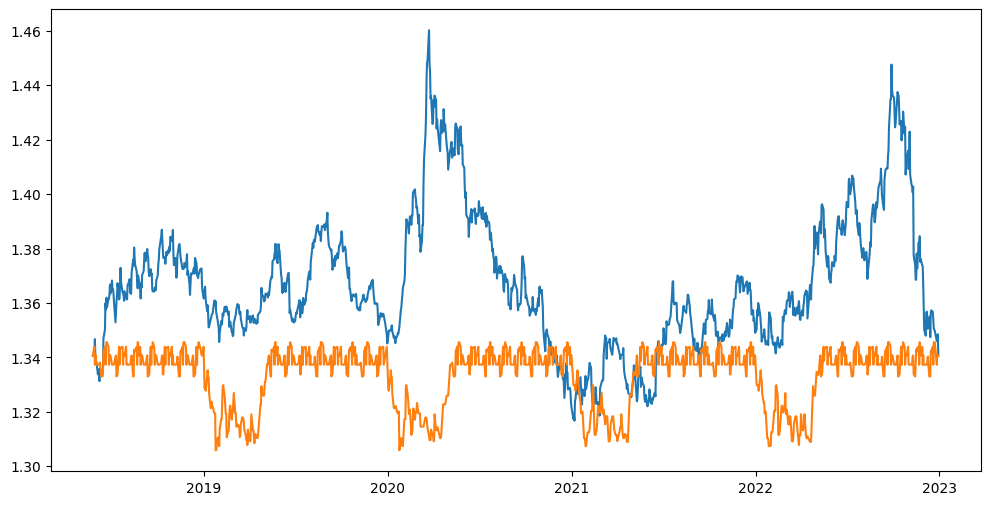

In [50]:
model = DecisionTreeRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()

In [51]:
evaluate(y_test,y_pred)

AIC: 9.826414233041799 
 MAE: 0.03432300185195929 
 MSE: 0.0017647324457140273


{'AIC': 9.826414233041799,
 'mae': 0.03432300185195929,
 'mse': 0.0017647324457140273}

In [52]:

from sklearn.model_selection import GridSearchCV

In [53]:
# Hyper parameters range intialization for tuning 

parameters={
            "max_depth" : [1,3,5,7,9,11,12,15,18,20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [54]:
import datetime

In [55]:

# # Create the decision tree classifier
# dt_regressor = DecisionTreeRegressor()

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=dt_regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X, y)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Create a new decision tree Regressor with the best parameters
# best_dt_regressor = DecisionTreeRegressor(**best_params)
# best_dt_regressor.fit(X, y)

In [56]:
# y_pred = best_dt_regressor.predict(X_test)

In [57]:
model = DecisionTreeRegressor(max_depth=10, max_features= 'log2', max_leaf_nodes=30,
                      min_samples_leaf=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

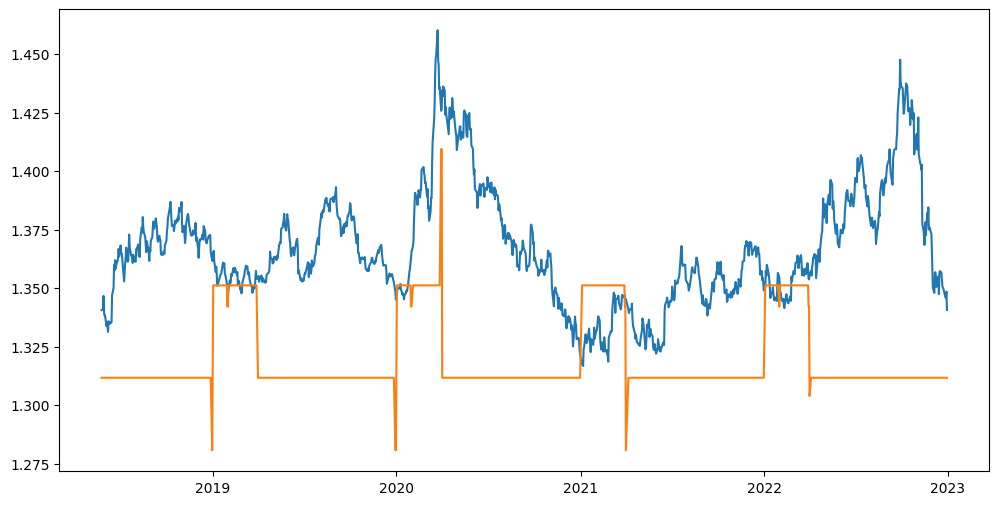

In [58]:
plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()

In [59]:
evaluate(y_test,y_pred)

AIC: 8.623752327282723 
 MAE: 0.04900289573129023 
 MSE: 0.0032198347647463335


{'AIC': 8.623752327282723,
 'mae': 0.04900289573129023,
 'mse': 0.0032198347647463335}

### Exploring ARIMA Time Series

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf
from pmdarima.arima import auto_arima

In [61]:
model = auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',
                      max_p=10, max_q=10,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-54628.951, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-54623.873, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-54628.342, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-54628.601, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-54624.981, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-54626.661, Time=1.93 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-54626.699, Time=1.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-54629.139, Time=1.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-54628.035, Time=1.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-54626.088, Time=1.84 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-54630.151, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-54629.651, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-54627.889, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-54629.028, Time=0.66 sec
 ARIM

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6719
Model:               SARIMAX(0, 1, 2)   Log Likelihood               27318.075
Date:                Tue, 18 Jul 2023   AIC                         -54630.151
Time:                        14:11:46   BIC                         -54609.713
Sample:                             0   HQIC                        -54623.094
                               - 6719                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0317      0.009     -3.597      0.000      -0.049      -0.014
ma.L2         -0.0183      0.011     -1.643      0.100      -0.040       0.004
sigma2      1.718e-05   1.43e-07    120.022      0.000    1.69e-05    1.75e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12086.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
# Forecast

prediction, confint = model.predict(n_periods=len(X_test), return_conf_int=True)

prediction

c:\Users\eric2\Currency-Prediction\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\eric2\Currency-Prediction\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


6719    1.340650
6720    1.340651
6721    1.340651
6722    1.340651
6723    1.340651
          ...   
8394    1.340651
8395    1.340651
8396    1.340651
8397    1.340651
8398    1.340651
Length: 1680, dtype: float64

In [64]:
cf= pd.DataFrame(confint)

In [65]:
prediction_series = pd.Series(prediction)

In [66]:
prediction_series = prediction_series.reset_index()

In [67]:
prediction_series.drop(columns= "index", inplace = True)

In [68]:
y_train

Date
2000-01-03    1.661943
2000-01-04    1.654246
2000-01-05    1.654996
2000-01-06    1.664517
2000-01-07    1.662388
                ...   
2018-05-22    1.337290
2018-05-23    1.345576
2018-05-24    1.340894
2018-05-25    1.340642
2018-05-25    1.340642
Name: SGD, Length: 6719, dtype: float64

In [69]:
prediction_series.set_index((pd.to_datetime(y_test.index)), inplace = True)

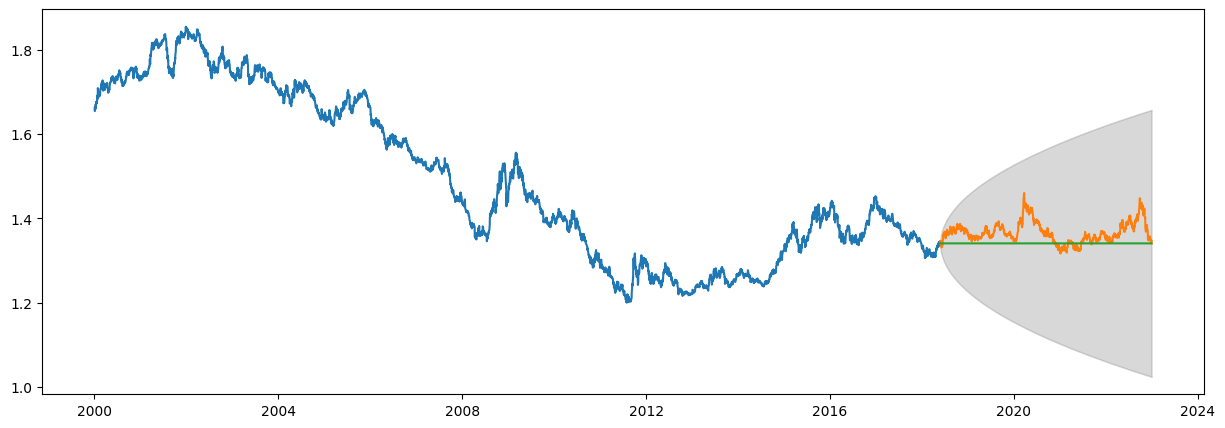

In [70]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(y_train)
ax.plot(y_test)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

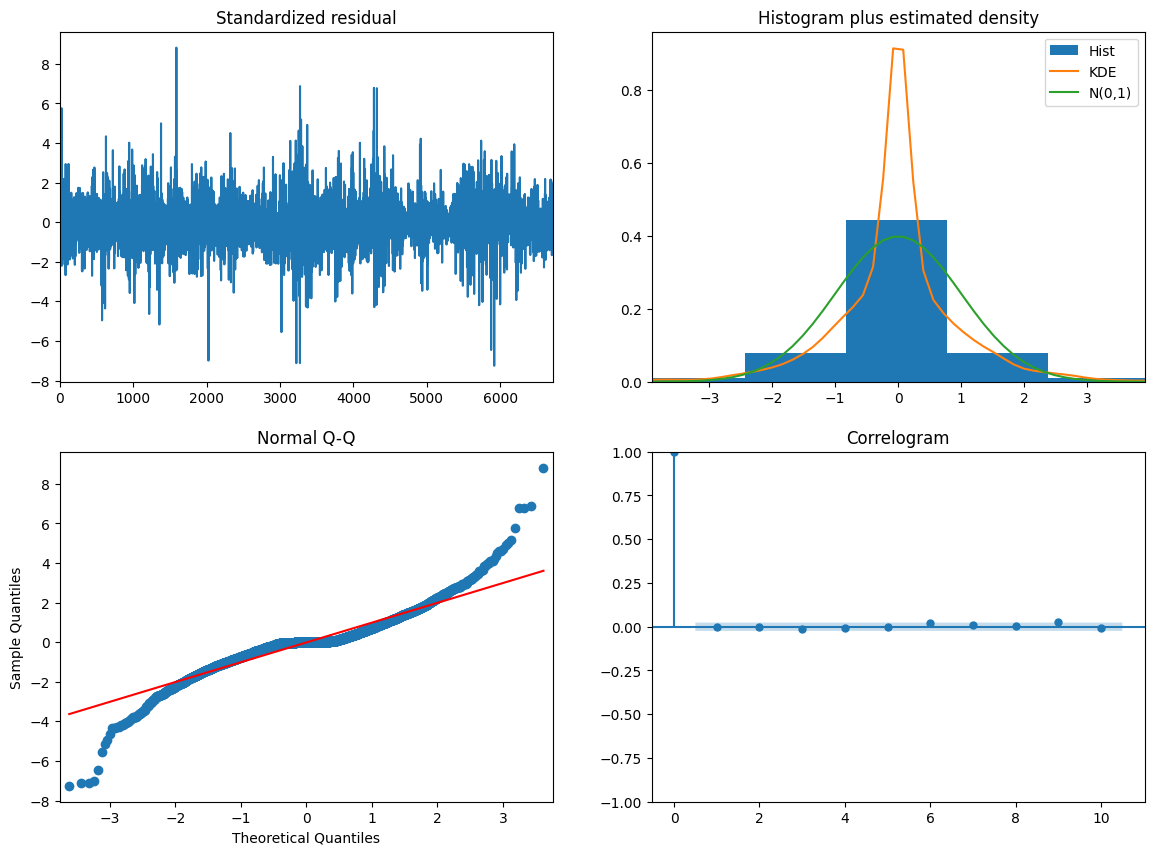

In [71]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [72]:
evaluate(y_test,prediction)

AIC: 10.458397551153675 
 MAE: 0.028322124017700328 
 MSE: 0.0012866055980258017


{'AIC': 10.458397551153675,
 'mae': 0.028322124017700328,
 'mse': 0.0012866055980258017}

### XGBOOST

In [73]:
from xgboost import XGBRegressor

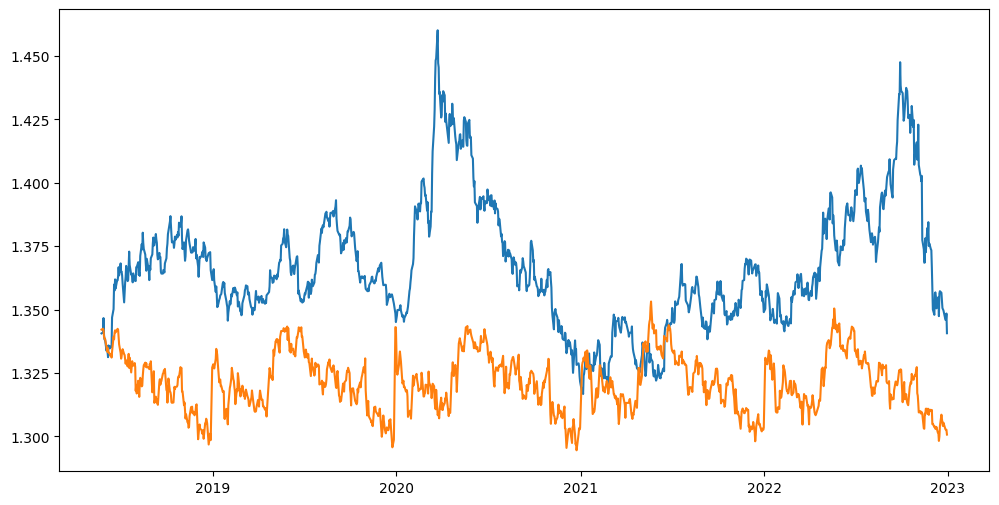

In [74]:
model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

plt.show()


In [75]:
evaluate(y_test,y_pred)

AIC: 8.948307455535916 
 MAE: 0.046111820347635606 
 MSE: 0.002737520212882898


{'AIC': 8.948307455535916,
 'mae': 0.046111820347635606,
 'mse': 0.002737520212882898}

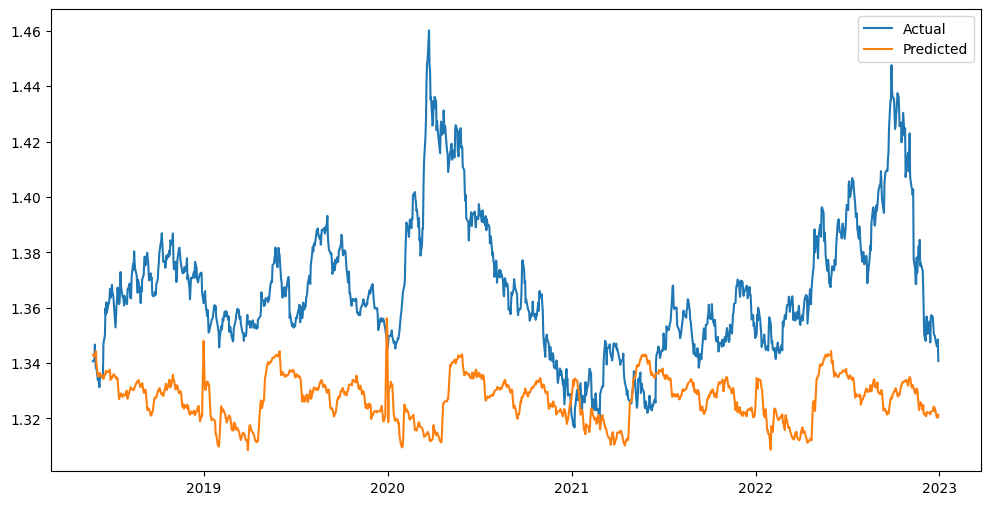

In [76]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create the XGBRegressor model
model = XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new XGBRegressor model with the best parameters
best_model = XGBRegressor(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()

In [77]:
evaluate(y_test,y_pred)

AIC: 9.40713963906744 
 MAE: 0.040141501557353194 
 MSE: 0.0021763221981843657


{'AIC': 9.40713963906744,
 'mae': 0.040141501557353194,
 'mse': 0.0021763221981843657}

#### Time Series Analysis may not work very well in forecasting currency as there are many other factors that may lead to the increase or decrease in their value such as economic growth of the country, political events, and etc which may result in the fluctuation of the currency value of the country.

In [78]:
df_clean.head()

,Date,EUR,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,2000-01-03,0.991080,1.0,101.833499,35.741328,7.374034,0.619029,252.259663,4.146184,8.475719,1.589990,7.990089,1.520912,1.444698,7.792270,1129.851338,1.915857,1.661943,6.145986
1,2000-01-04,0.970403,1.0,102.746240,35.196507,7.222610,0.610966,246.986900,4.116739,8.366327,1.557787,7.908782,1.521300,1.449393,7.782727,1123.066473,1.916060,1.654246,6.121980
2,2000-01-05,0.964506,1.0,103.530093,35.047261,7.180170,0.609954,245.476466,4.111400,8.334780,1.548997,7.914738,1.521316,1.453029,7.776717,1134.336420,1.924769,1.654996,6.072531
3,2000-01-06,0.962649,1.0,104.659222,34.889295,7.166057,0.606662,244.946092,4.100212,8.321621,1.546785,7.896611,1.523681,1.452734,7.782345,1147.381594,1.931459,1.664517,6.093955
4,2000-01-07,0.972384,1.0,105.105018,35.032089,7.238040,0.608907,247.598211,4.073998,8.406262,1.563497,7.968203,1.530338,1.459549,7.781991,1137.222870,1.939129,1.662388,6.066997


We want to see if other currency's trend affect SGD.

In [79]:
cols_to_scale = ["EUR",  "JPY" , "CZK", "DKK" , "GBP", "HUF" , "PLN" ,"CHF", "NOK", "AUD", "CAD", "HKD", "KRW", "NZD", "ZAR"]

In [80]:
df_scaled = df_clean.copy()

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
scaler.fit(df_clean[cols_to_scale])

scaled_data = scaler.transform(df_clean[cols_to_scale])

df_scaled = pd.DataFrame(df_scaled, columns= cols_to_scale)


In [84]:
df_scaled

,EUR,JPY,CZK,DKK,GBP,HUF,PLN,CHF,NOK,AUD,CAD,HKD,KRW,NZD,ZAR
0,0.991080,101.833499,35.741328,7.374034,0.619029,252.259663,4.146184,1.589990,7.990089,1.520912,1.444698,7.792270,1129.851338,1.915857,6.145986
1,0.970403,102.746240,35.196507,7.222610,0.610966,246.986900,4.116739,1.557787,7.908782,1.521300,1.449393,7.782727,1123.066473,1.916060,6.121980
2,0.964506,103.530093,35.047261,7.180170,0.609954,245.476466,4.111400,1.548997,7.914738,1.521316,1.453029,7.776717,1134.336420,1.924769,6.072531
3,0.962649,104.659222,34.889295,7.166057,0.606662,244.946092,4.100212,1.546785,7.896611,1.523681,1.452734,7.782345,1147.381594,1.931459,6.093955
4,0.972384,105.105018,35.032089,7.238040,0.608907,247.598211,4.073998,1.563497,7.968203,1.530338,1.459549,7.781991,1137.222870,1.939129,6.066997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.941265,133.358434,22.835090,6.999812,0.831448,378.059111,4.394108,0.930441,9.873400,1.484375,1.353916,7.800640,1270.566642,1.592244,17.242188
8395,0.939850,133.656015,22.793233,6.989192,0.827613,379.041353,4.418045,0.926974,9.820959,1.471805,1.349718,7.794267,1267.471805,1.576316,17.188910
8396,0.939055,133.571227,22.716687,6.983285,0.831524,375.246502,4.399944,0.924030,9.907034,1.489248,1.359283,7.793596,1267.893699,1.585783,17.087708
8397,0.937559,131.876992,22.610163,6.972155,0.831549,375.839115,4.388524,0.923214,9.857304,1.471311,1.353835,7.797019,1260.163135,1.574911,16.968498


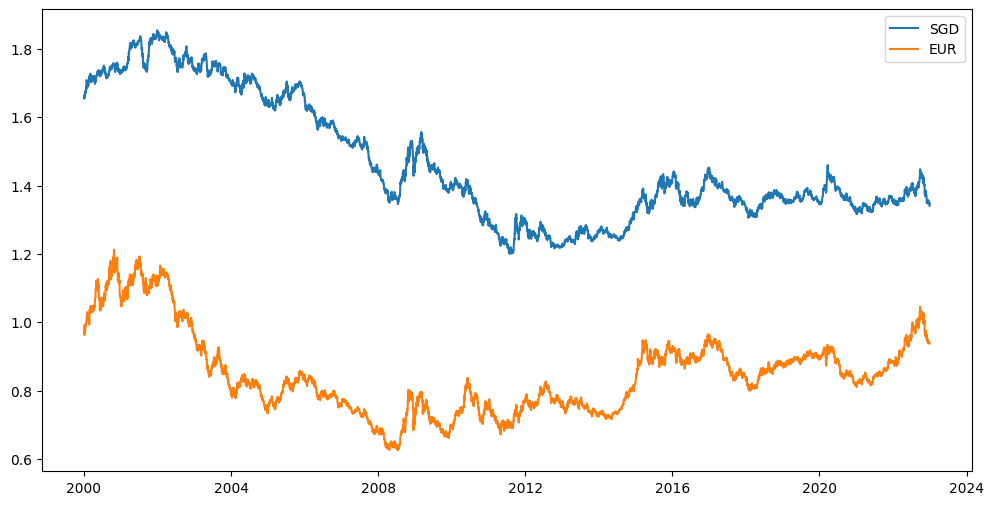

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(df_clean["Date"], df_clean["SGD"], label='SGD')
plt.plot(df_clean["Date"], df_scaled["EUR"], label='EUR')
plt.legend()
plt.show()

In [93]:
X = df_scaled
y = df_clean["SGD"]

In [94]:
split_ratio = 0.8
size = len(df_clean["SGD"])
train_size = round(split_ratio*size)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR     6719 non-null   float64
 1   JPY     6719 non-null   float64
 2   CZK     6719 non-null   float64
 3   DKK     6719 non-null   float64
 4   GBP     6719 non-null   float64
 5   HUF     6719 non-null   float64
 6   PLN     6719 non-null   float64
 7   CHF     6719 non-null   float64
 8   NOK     6719 non-null   float64
 9   AUD     6719 non-null   float64
 10  CAD     6719 non-null   float64
 11  HKD     6719 non-null   float64
 12  KRW     6719 non-null   float64
 13  NZD     6719 non-null   float64
 14  ZAR     6719 non-null   float64
dtypes: float64(15)
memory usage: 787.5 KB


In [96]:
y_train.head()

0    1.661943
1    1.654246
2    1.654996
3    1.664517
4    1.662388
Name: SGD, dtype: float64

### Linear Regression Model

In [97]:
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

evaluate(y_test,y_pred)

AIC: 8.273343488505843 
 MAE: 0.051573721533712695 
 MSE: 0.003836400136039709


{'AIC': 8.273343488505843,
 'mae': 0.051573721533712695,
 'mse': 0.003836400136039709}

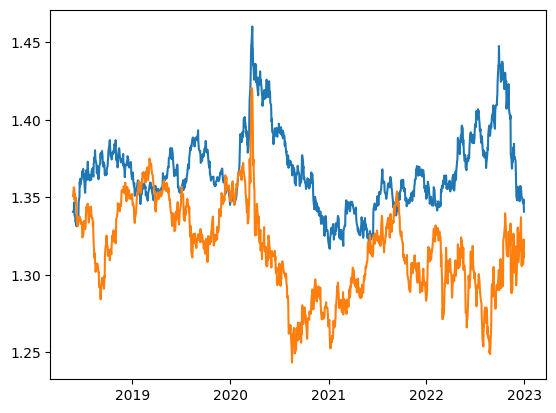

In [98]:
plt.plot( df_clean.Date[train_size:] , y_test)
plt.plot( df_clean.Date[train_size:],  y_pred)

plt.show()

### Decision Tree Model

In [99]:
model = DecisionTreeRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

evaluate(y_test,y_pred)

AIC: 11.861976105040696 
 MAE: 0.020412445444561833 
 MSE: 0.0006377672679685258


{'AIC': 11.861976105040696,
 'mae': 0.020412445444561833,
 'mse': 0.0006377672679685258}

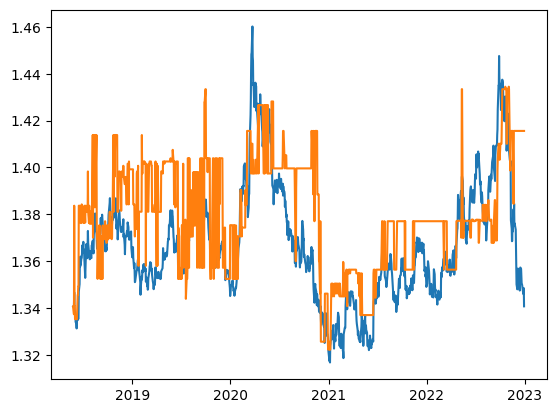

In [100]:
plt.plot( df_clean.Date[train_size:] , y_test)
plt.plot(df_clean.Date[train_size:],  y_pred)

plt.show()

In [101]:
model = XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

evaluate(y_test,y_pred)

AIC: 12.57295593254031 
 MAE: 0.016581891418478194 
 MSE: 0.00044696644259309464


{'AIC': 12.57295593254031,
 'mae': 0.016581891418478194,
 'mse': 0.00044696644259309464}

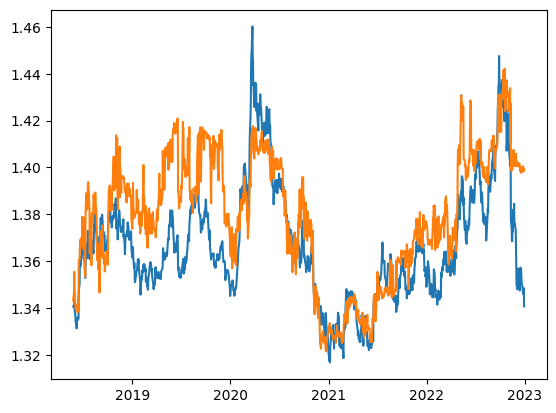

In [102]:
plt.plot( df_clean.Date[train_size:] , y_test)
plt.plot(df_clean.Date[train_size:],  y_pred)

plt.show()